In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
import pandas as pd
from mpl_toolkits.basemap import Basemap
from matplotlib import cm
import warnings
warnings.filterwarnings("ignore")

### Review of lecture 24


In Lecture 24 we  

- Learned about plotting great and small circles on various projections. 

### In this lecture we will:

-  Learn about 3D plots of points and surfaces
- Show some examples with subduction zone Earthquakes and some simple geophysical examples.






### 3D Plotting with Python

Contour plots are really just a way to visualize something that is inherently 3D on a 2D surface.  Think about our topographic map - the contour intervals are elevations and our brains can reconstruct the 3D world by looking at the contours on the map.  But with computers we can visualize the 3D world in a more realistic manner.  There are lots of 3D plotting packages, and even within Python there are several different approaches.  One uses  **mplot3d**, a 3D toolkit of **matplotlib** that uses the same logic as for "regular"  **matplotlib**. For more on this module, see:

http://matplotlib.sourceforge.net/mpl_toolkits/mplot3d/index.html


 But for more 3D horsepower, there is a module called **mlab**, which is part of the **mayavi** module.  See: 
 
 
 http://github.enthought.com/mayavi/mayavi/mlab.html


 And then there is **Mayavi** itself, which comes with the Canopy Python Edition.   This was way beyond what I know, but if you are curious, check out this website:
 
 http://github.enthought.com/mayavi/mayavi/examples.html
 




## Plotting points in 3D

Remember this plot from Lecture 20?

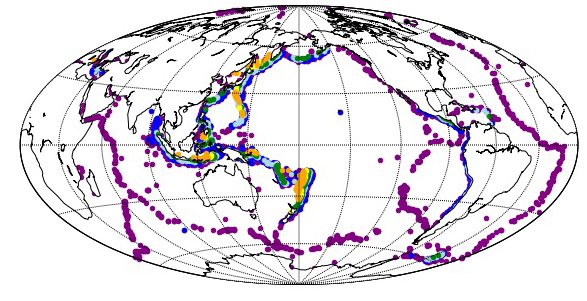

In [2]:
Image(filename='Figures/earthquakes_depth.png')

We tried to show earthquake depths by using different colors and you can see that there are increasingly deep earthquakes as you go away from subduction zones.  Sort of.  

It would be more instructive to be able to visualize the locations of earthquakes as points in 3D projection.   So let's read the data in again and filter for a lat/lon box from 35 S to 20 N and 170-190 E (the Marianas trench).

Let's filter the data first fishing out data from the desired box and making an x array of the longitude values, a y array with the latitudes and a z array with the depths.  



In [3]:
# read in the data from the Lecture 20 as a Pandas DataFrame: 
eq_data=pd.read_csv('Datasets/EarthquakeLocations/last5Years.csv',skiprows=1)

# define some boundaries for our box
lat_min,lon_min,lat_max,lon_max=-35,175,-15,190

# use Pandas filtering to fish out lat/lon in this range
box=eq_data[(eq_data.longitude.values%360<lon_max)&(eq_data.longitude.values%360>=lon_min)] 
box=box[(box.latitude.values<lat_max)&(box.latitude.values>=lat_min)] 

# and export them to NumPy arrays
x=box.longitude.values%360
y=box.latitude.values
z=-box.depth.values


We can use the **Axes3D** class from the **mplot3d**, which is another tool in the **matplotlib** toolkit (**mpl_toolkits**). [Remember that is where we got Basemap.] 

We will import the **Axes3D** module, but before we can use it, we have to make the notebook ready for 3D plots (by setting %matplotlib notebook). 

In [4]:
# import the module
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook


The trick for using **Axes3D** is first to make a figure object (here called **fig**) using **plt.figure( )**, 
then use the figure method **fig.add_subplot( )**  to make an **Axis** instance (here called **ax**), setting the keyword **projection**  to '3d'.   


<IPython.core.display.Javascript object>


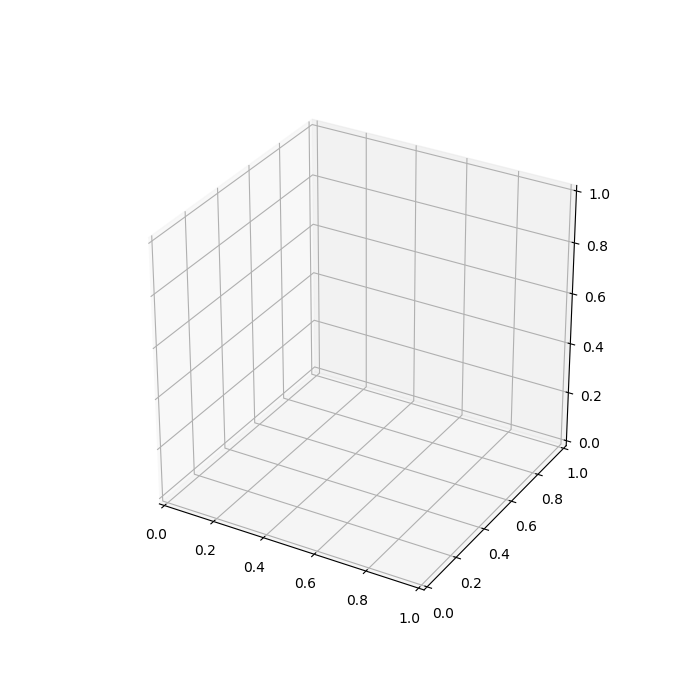

In [5]:
fig=plt.figure(1,(7,7)) # we need to make a figure object
ax = fig.add_subplot(111, projection='3d'); # so we can do this.  


This makes an empty set of axes.   But you can twirl them around!  [Okay, I thought that was cool.]  


Now we can decorate the plot with some data.  

<IPython.core.display.Javascript object>


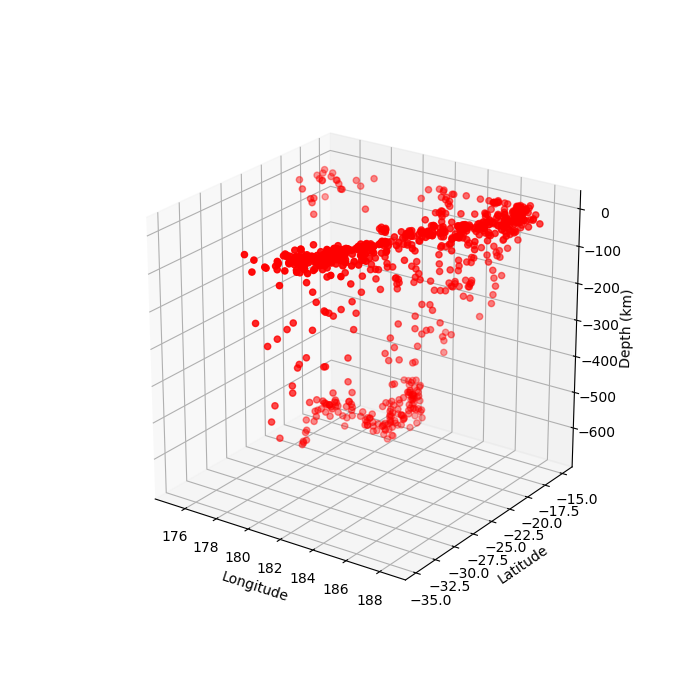

In [6]:
fig=plt.figure(2,(7,7)) # let's make a new one.
ax = fig.add_subplot(111, projection='3d') # so we can do this.  


ax.scatter(x,y,z,c='r',marker='o')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('Depth (km)');

Try twirling the figure around!  Can you see the slab?  

You can imagine other enhancements, like setting the size of the points to be proportional to the size of the earthquake...  In fact, it is **Practice** time!

### Practice with mplot3d

Modify the Marianas Trench earthquake plot to set the symbol size to be proportional to the magnitude of the earthquake.
- look at the columns in the DataFrame called **box**.
- Apparently, the 'mag' column is the earthquake magnitude. 
- Use the **markersize** keyword to control the size of the points.

### 3D contour type plots


In the last lecture we learned how to make 2D color contour plots.  But 3D is much more fun so, let's try to make a 3D version of something geophysical, namely the gravity anomaly of a buried sphere. 

Let's choose a sphere with a radius $R$ of 2 m (whose volume is ${{4\pi}\over{3}}R^3$), that is buried $z=$ 3 m deep.  The sphere's density ($\Delta \rho$) is 500 kg/m$^3$, which is for this purpose, much higher than the surrounding material.    Oh and we'll need the universal gravitational constant $G$, which is  6.67x 10$^{-11}$ Nm$^2$/kg$^2$.

The formula for gravitational attraction of such a body is: 

$$g= {{4\pi}\over{3}} R^3 {{G   \Delta \rho}\over{(h^2+z^2})},$$

where $h$ is the horizontal distance from the mass.

The units (from dimensional analysis remembering that Newtons are kg $\cdot$ m $\cdot$ s$^2$) are m $\cdot$ s$^{-2}$.  1 Gal (for Galileo) = 1 cm $\cdot$s$^{-2}$, so to convert $g$ to the units of microgals, we multiply the above by 10$^{8}$.  

We can make our equation a lambda function.

In [7]:
gravity= lambda G,R,drho,h,z : (1e8*G*4.*np.pi*R**3.*drho)/(3.*(h**2+z**2)) # gravitational attraction. 

And set up the arrays the same way as we did in the last lectures as a color contour on a 2D surface. 




In [8]:
x=np.arange(-6.,6.,0.1) # range of x values
y=np.arange(-6,6.,0.1) # range of y values
X,Y=np.meshgrid(x,y) # make a meshgrid

To the gravity array **g**, we need z,G,R and $\Delta \rho$ and **h** the horizontal distance from ground zero of the buried sphere, which is of course given by: 

$$ h=\sqrt {x^2 + y^2}. $$  



In [9]:
# define the other parameters
z=3.
G=6.67e-11 # grav constant in Nm^2/kg^2 (SI)
R=2. # radius in meters
drho=500 # density contrast in kg/m^3

h=np.sqrt(X**2+Y**2) # get the horizontal distance from ground zero for x,y
# and make the g array
g=gravity(G,R,drho,h,z) # multipy by a million to get the units reasonable for the plots.

We want to make the plot of the gravitational attraction first using our old friend from the last lecture, **plt.contourf( )**. 

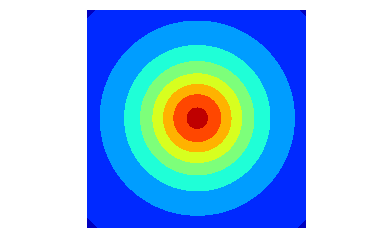

In [10]:
# put this back to 'normal' for use in the notebook.  
%matplotlib inline 
plt.figure(3)
plt.contourf(x,y,g,cmap=cm.jet)
plt.axis('equal')
plt.axis('off');




### Practice with color maps
- Recreate the above image with different color maps.  Which do you think gives the most information?  

### 3D Surfaces

To plot this in 3D, we have a few options. First let's try the one closest to
what we already know from matplotlib, **Axes3D**.  There is a **Axes3D** method called **plot_surface** which might do the trick.  



We can use the same arrays again, this time plotting them as a 3D surface.

But first some peculiarities about jupyter notebooks.  Until now, we have been using
%matplotlib inline to allow the notebook to make matplotlib plots as objects visible in the notebook.  But to give them 3D interaction (like the twirling earthquake plot), we have to use the alternative:  %matplotlib notebook

I found some interesting discussions of this issue here: 

https://github.com/matplotlib/matplotlib/issues/4879

If someone figures it out, please let me know. 

Anyway, for an interactive plot (one you can twirl), you just make a call to 
%matplotlib notebook.  

 In the following plot, we  create an **Axes3D** instance called **ax**  from the **figure** object,  **fig**.   **Axes3D** objects have lots of methods, one of which is  **plot_surface**, which plots a wireframe surface on the **meshgrid**, **X** and **Y** of the data in  **g**.    Other methods of **Axes3D** objects are  **set_xlabel()** and so on.  Also, note how if we name the surface instance, e.g., **surf**, we can do other things to it, like add a color bar.  Finally, please admire the use of a colormap  (**cmap=cm.rainbow**).




<IPython.core.display.Javascript object>


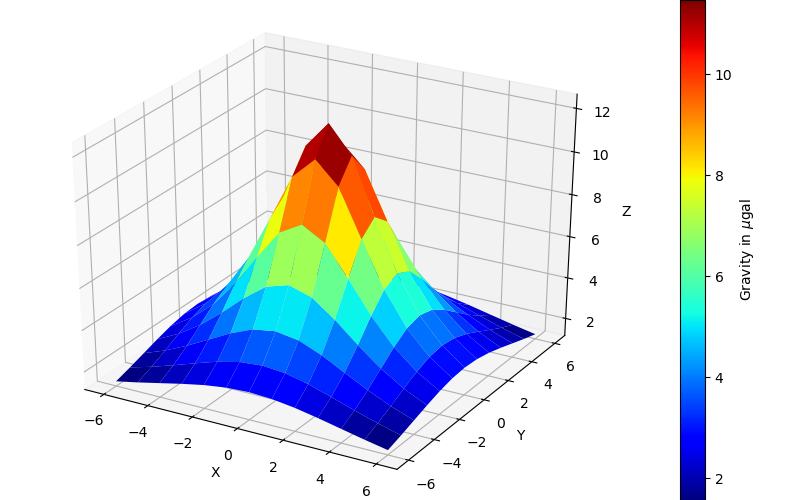

In [14]:
 # make the notebook ready for interactive 3D plots again
%matplotlib notebook 
fig=plt.figure(4,(8,5)) # make a figure object
ax=Axes3D(fig) # give it the powers of an Axes3D object
surf=ax.plot_surface(X,Y,g,cmap=cm.jet) # use plot_surface to do the plot using a color map
ax.set_xlabel('X') # and label the axes
ax.set_ylabel('Y')
ax.set_zlabel('Z')
bar=fig.colorbar(surf)
bar.set_label('Gravity in $\mu$gal');



### Practice with mplot3d
- Import the random function from numpy and use it to generate 3 arrays with 10 points each. Call them a,b and c to avoid conflicts with other arrays in this notebook.  
- plot the points using  pylab's **ax.scatter( )** (which we used before).



### Plotting vectors

Before we leave the gravity anomaly problem, consider one more way to plot the data.  Gravity data are inherently vectors, so we could plot them as arrows.  This can be done  using the **plt.quiver( )** method.





In [11]:
help(plt.quiver)

Help on function quiver in module matplotlib.pyplot:

quiver(*args, **kw)
    Plot a 2-D field of arrows.
    
    Call signatures::
    
      quiver(U, V, **kw)
      quiver(U, V, C, **kw)
      quiver(X, Y, U, V, **kw)
      quiver(X, Y, U, V, C, **kw)
    
    *U* and *V* are the arrow data, *X* and *Y* set the location of the
    arrows, and *C* sets the color of the arrows. These arguments may be 1-D or
    2-D arrays or sequences.
    
    If *X* and *Y* are absent, they will be generated as a uniform grid.
    If *U* and *V* are 2-D arrays and *X* and *Y* are 1-D, and if ``len(X)`` and
    ``len(Y)`` match the column and row dimensions of *U*, then *X* and *Y* will be
    expanded with :func:`numpy.meshgrid`.
    
    The default settings auto-scales the length of the arrows to a reasonable size.
    To change this behavior see the *scale* and *scale_units* kwargs.
    
    The defaults give a slightly swept-back arrow; to make the head a
    triangle, make *headaxislength* the

So we need the x,y coordinates of the gravity vector and plot the arrows
at the evaluation points. 

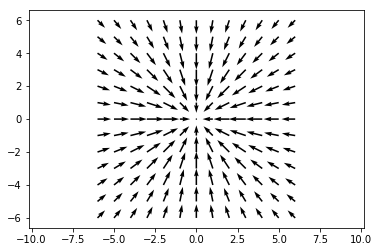

In [12]:
# we need to  redo what we already did.  but at lower resolution
z=3.
G=6.67e-11 # grav constant in Nm^2/kg^2 (SI)
R=2. # radius in meters
drho=500 # density contrast in kg/m^3

h=np.sqrt(X**2+Y**2) # get the horizontal distance from ground zero for x,y
# and make the g array
g=gravity(G,R,drho,h,z) # multipy by a million to get the units reasonable for the plots.

x=np.arange(-6,6.5,1) # range of x values
y=np.arange(-6.,6.5,1) # range of y values
X,Y=np.meshgrid(x,y) # make a meshgrid
h=np.sqrt(X**2+Y**2) # get the horizontal distance from ground zero for x,y
g=gravity(G,R,drho,h,z) # re-use our lambda function

#  now make the horizontal projections along X and Y
U=-X*g
V=-Y*g
# and plot
plt.quiver(x,y,U,V)
plt.axis('equal');

This lecture was just a taste of the joys of 3D plotting.  Here are some examples to inspire you.  


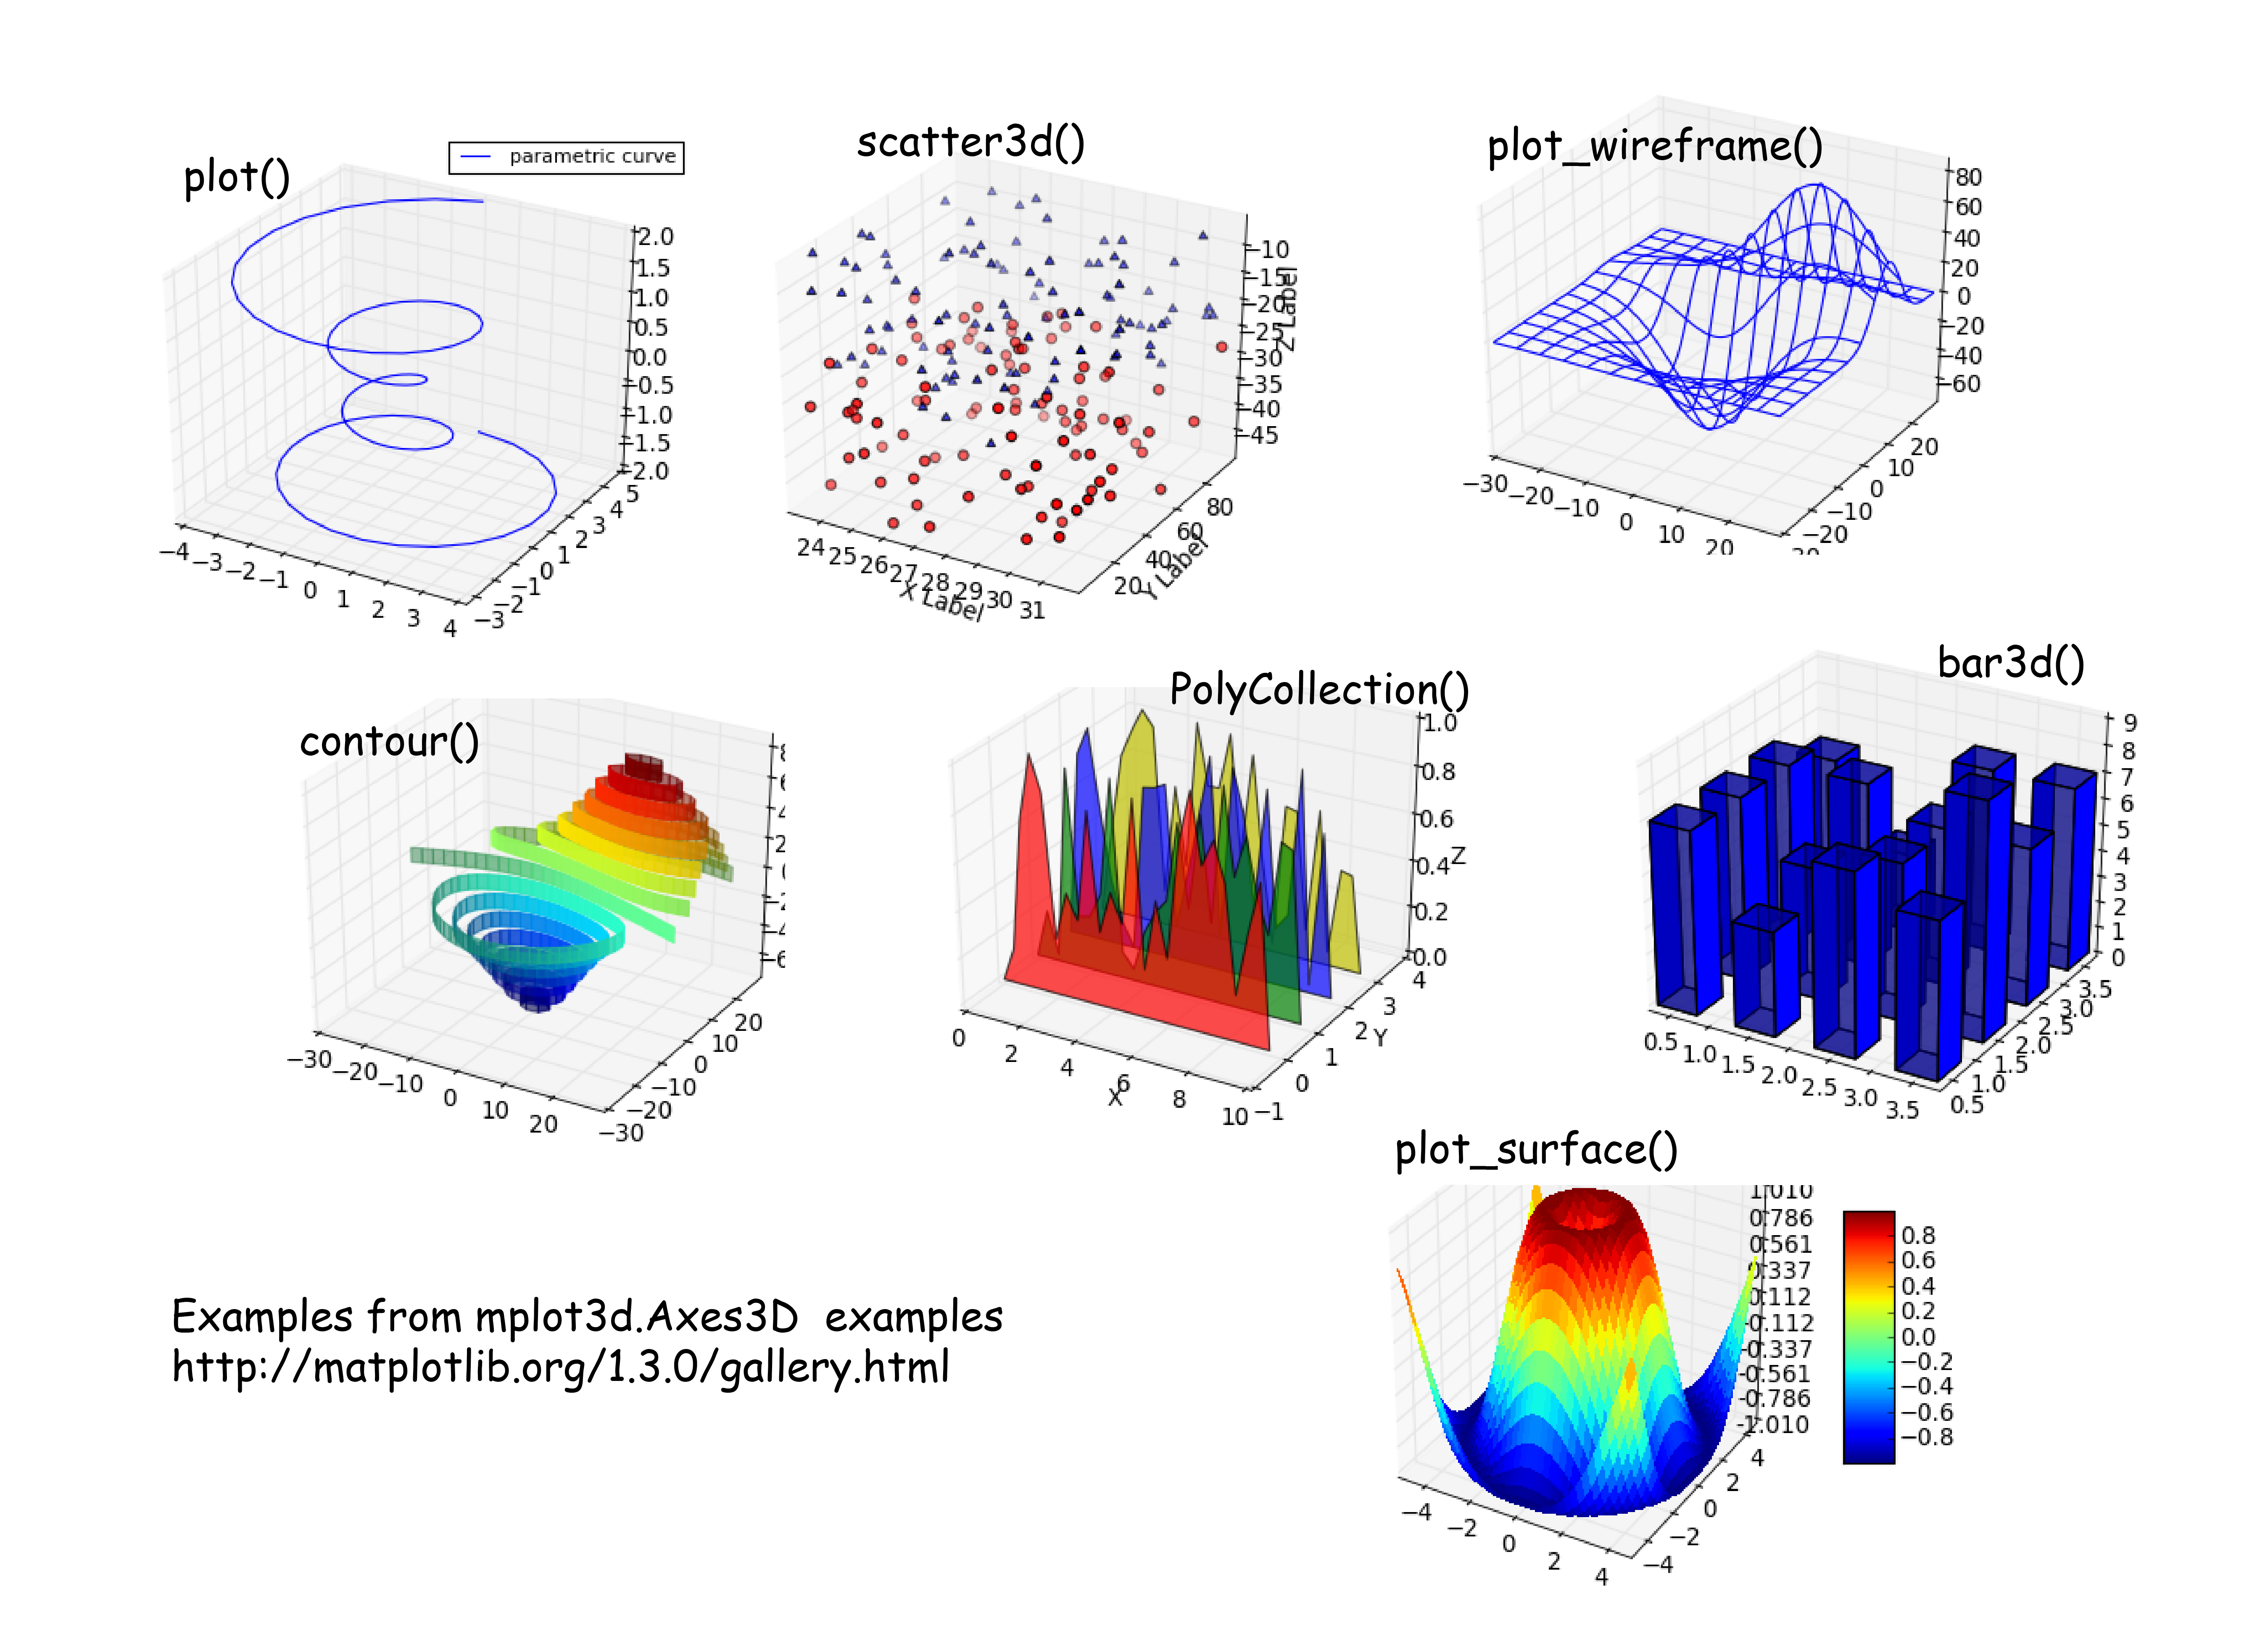

In [13]:
Image(filename='Figures/mplot3d-examples.png')

Enjoy!